In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/police.csv')

# I. An overview

In [3]:
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
print(df.shape,  "\n", df.columns)

(91741, 15) 
 Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [6]:
df.describe(include = ['O', bool])

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
count,91741,91741,91741,86536,86539,86539,86539,91741,3307,86539,86539,86539,91741,91741
unique,1,3757,1431,2,5,12,6,2,25,6,2,3,2,6
top,RI,2007-05-16,11:00,M,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False,Zone X4
freq,91741,63,358,62762,61872,48424,48424,88434,1290,77092,83461,69579,90879,24279


## 1. NaN values

In [7]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [8]:
df.drop('county_name', inplace = True, axis = 1)

In [9]:
df.dropna(subset=['is_arrested', 'driver_gender'], inplace = True)

In [10]:
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

## 3. Duplicated values

In [11]:
df.duplicated().sum()

363

In [12]:
df.drop_duplicates(inplace = True)

## 2. Index: Choose date time for indexing

In [13]:
combined = df.stop_date.str.cat(df.stop_time, sep =" ")
df['stop_datetime'] = pd.to_datetime(combined, errors = 'coerce')
# erroes becoms NA

In [14]:
df['stop_datetime'].isnull().sum()

0

In [15]:
df.set_index('stop_datetime', inplace = True)

In [16]:
df.head(2)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


# II. Consider only some columns (for simplicity)

## 1. Column "is_arrested"

In [17]:
df['is_arrested'].unique()

array([False, True], dtype=object)

In [18]:
df['is_arrested'] = df['is_arrested'].astype('bool')

# 2. Stop_outcome vs Driver_race
    - In two tables below, each column represents the numbers/rate of stop_outcome in each group driver ()

In [19]:
pd.crosstab(df.stop_outcome, df.driver_race)

driver_race,Asian,Black,Hispanic,Other,White
stop_outcome,,,,,
Arrest Driver,40,659,534,2,1466
Arrest Passenger,4,102,67,0,170
Citation,2197,10502,8262,243,55576
N/D,10,104,92,2,398
No Action,20,80,86,3,432
Warning,108,796,656,14,3548


In [20]:
pd.crosstab(df.stop_outcome, df.driver_race, normalize = 1)

driver_race,Asian,Black,Hispanic,Other,White
stop_outcome,,,,,
Arrest Driver,0.016814,0.053827,0.055069,0.007576,0.023803
Arrest Passenger,0.001681,0.008331,0.006909,0.000000,0.002760
Citation,0.923497,0.857796,0.852016,0.920455,0.902354
N/D,0.004203,0.008495,0.009487,0.007576,0.006462
No Action,0.008407,0.006534,0.008869,0.011364,0.007014
Warning,0.045397,0.065017,0.067650,0.053030,0.057607


# 3. Driver_gender" and "violation" vs Stop outcome

In [21]:
df.pivot_table(index=["driver_gender","violation"], columns='stop_outcome',
               aggfunc={'stop_outcome':len}, fill_value=0)

stop_outcome                            \
stop_outcome                      Arrest Driver Arrest Passenger Citation   
driver_gender violation                                                     
F             Equipment                     117               51     1785   
              Moving violation              178               35     2731   
              Other                          77                2      444   
              Registration/plates            81               10      898   
              Seat belt                       7                5      480   
              Speeding                       88               10    14851   
M             Equipment                     430              105     6418   
              Moving violation              666               55    11125   
              Other                         261                8     3072   
              Registration/plates           231               14     2222   
              Seat belt                      55                6     1932   
              Speeding                      510               42    30822   

                                                          
stop_outcome                       N/D No Action Warning  
driver_gender violation                                   
F             Equipment            129        14     400  
              Moving violation      10        16     311  
              Other                 11       158      10  
              Registration/plates    3         6      53  
              Seat belt              0         0      84  
              Speeding              15         6     622  
M             Equipment            326        40    1081  
              Moving violation      30        57     936  
              Other                 32       268      40  
              Registration/plates   15        14     133  
              Seat belt              3         7     271  
              Speeding              32        35    1181

# 4. Driver_gender/District vs is_arrested
-  Ratio of arrest (general)
-  Ratio of arrest (by gender)
-  Ratio of arrest (in the district 'Zone K2')

In [22]:
df.is_arrested.mean()

0.035324289510635584

In [23]:
df.is_arrested.value_counts(normalize=True)

False    0.964676
True     0.035324
Name: is_arrested, dtype: float64

In [24]:
pd.crosstab(df.is_arrested, df.driver_gender, normalize = 1)
#Xem cột

driver_gender,F,M
is_arrested,,
False,0.972107,0.961857
True,0.027893,0.038143


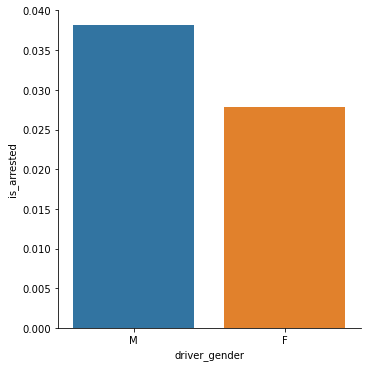

In [25]:
sns.catplot(x = 'driver_gender', y = 'is_arrested',  data = df, kind = 'bar', ci = None);

In [26]:
df[df.district == 'Zone K2'].is_arrested.mean()

0.03052044186311354

In [27]:
df.groupby(['district', 'driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019208
          M                0.026704
Zone K2   F                0.021885
          M                0.034027
Zone K3   F                0.024483
          M                0.034335
Zone X1   F                0.019685
          M                0.024617
Zone X3   F                0.026871
          M                0.037810
Zone X4   F                0.042271
          M                0.049970
Name: is_arrested, dtype: float64

## 5 Search_type columns (Does gender affect who is frisked during a search?)
- Cột loại (sự tìm kiếm, sự khám xét), Inventory = sự kiểm kê, frist = sự nô đùa

In [28]:
df["search_type"].value_counts(dropna=False)

NaN                                                         82877
Incident to Arrest                                           1283
Probable Cause                                                922
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  122
Incident to Arrest,Probable Cause                              99
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [29]:
df['inventory'] = df['search_type'].str.contains('Inventory', na=False)
# na=False returns False when it ×nds a missing value
df['inventory'].sum(), df['inventory'].mean()

(440, 0.005106007682220649)

**Remark**: 0.5% of all traf×c stops resulted in an inventory

In [30]:
searched = df[df.search_conducted == True]
searched["inventory"].mean()

0.13349514563106796

- 13.3% of searches included an inventory

In [31]:
searched.groupby(["driver_gender"])["inventory"].mean()

driver_gender
F    0.175824
M    0.126716
Name: inventory, dtype: float64

# III. Time vs is _arrested/drugs_related_stop
    - Ratio of is _arrested by hour
    - Ratio drugs_related_stop by year

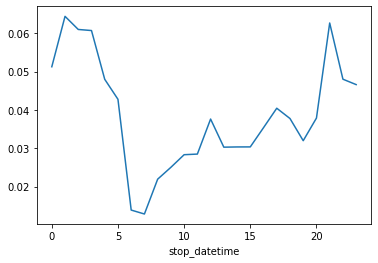

In [32]:
hourly_arrest_rate = df.groupby(df.index.hour)["is_arrested"].mean()
hourly_arrest_rate.plot();

<AxesSubplot:xlabel='stop_datetime'>

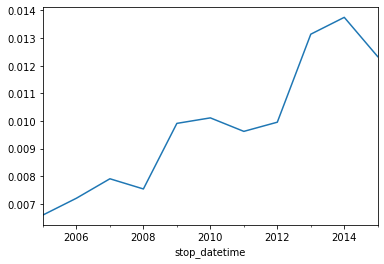

In [33]:
annual_drug_rate = df['drugs_related_stop'].resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# IV. How long might you be stopped for a violation? [Avarege]

In [34]:
df["stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [35]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df["stop_duration"].map(mapping)
df['stop_minutes'].unique()

array([ 8, 23, 45])

In [36]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
stop_length = df.groupby('violation_raw')['stop_minutes'].mean()
stop_length

violation_raw
APB                                 17.967033
Call for Service                    22.172938
Equipment/Inspection Violation      11.435756
Motorist Assist/Courtesy            17.715686
Other Traffic Violation             13.823406
Registration Violation              13.683967
Seatbelt Violation                   9.661053
Special Detail/Directed Patrol      15.127651
Speeding                            10.571867
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.200000
Warrant                             24.055556
Name: stop_minutes, dtype: float64

<AxesSubplot:ylabel='violation_raw'>

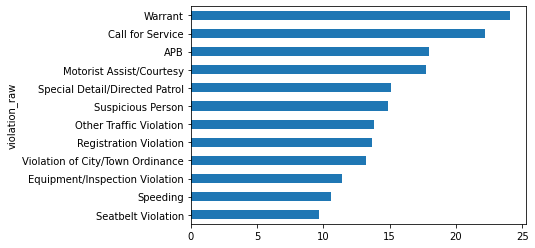

In [37]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind="barh")

# Weather vs DF

### 1. Weather dataFrame
- The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"

In [38]:
weather = pd.read_csv('datasets/weather.csv')

In [39]:
weather.shape

(4017, 27)

In [40]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'],
      dtype='object')

In [41]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [42]:
weather.dtypes

STATION     object
DATE        object
TAVG       float64
TMIN         int64
TMAX         int64
AWND       float64
WSF2       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WT10       float64
WT11       float64
WT13       float64
WT14       float64
WT15       float64
WT16       float64
WT17       float64
WT18       float64
WT19       float64
WT21       float64
WT22       float64
dtype: object

<AxesSubplot:ylabel='Frequency'>

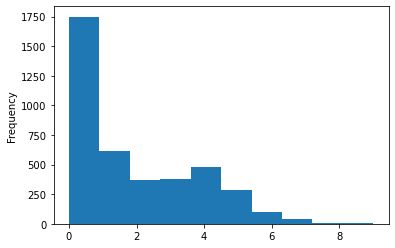

In [43]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01' : 'WT22']
weather['bad_conditions'] = WT.sum(axis=1)
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind="hist")

In [44]:
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [45]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}
weather['rating'] = weather.bad_conditions.map(mapping)
weather['rating'].value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

## 2.  DF: Stop length short medium long

In [46]:
mapping = {'0-15 Min':'short','16-30 Min':'medium','30+ Min':'long'}
df['stop_length'] = df.stop_duration.map(mapping)

In [47]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['short', 'medium', 'long'], ordered=True)
df['stop_length'] = df['stop_length'].astype(cat_type)

In [48]:
df.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013616
medium    0.093212
long      0.259655
Name: is_arrested, dtype: float64

## 3. ĐI đến kết luận

In [49]:
weather_rating = weather[['DATE', 'rating']]

In [54]:
df_weather = pd.merge(left=df, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
# Set 'stop_datetime' as the index of 'ri_weather'
combined = df.stop_date.str.cat(df.stop_time, sep =" ")
df['stop_datetime'] = pd.to_datetime(combined)
df_weather.set_index('stop_datetime', inplace=True)

In [55]:
df_weather.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,stop_minutes,stop_length,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,short,2005-01-04,bad
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,short,2005-01-23,worse
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,short,2005-02-17,good
2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23,medium,2005-02-20,bad
2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8,short,2005-02-24,bad


In [56]:
print(df_weather.is_arrested.mean())

0.035324289510635584


In [57]:
df_weather.groupby("rating")["is_arrested"].mean()

rating
bad      0.036068
good     0.033467
worse    0.041185
Name: is_arrested, dtype: float64

In [58]:
# Calculate the arrest rate for each 'violation' and 'rating'
df_weather.groupby(["violation", "rating"]).is_arrested.mean()

violation            rating
Equipment            bad       0.065901
                     good      0.058514
                     worse     0.097765
Moving violation     bad       0.057991
                     good      0.056117
                     worse     0.065541
Other                bad       0.086912
                     good      0.076966
                     worse     0.063091
Registration/plates  bad       0.098148
                     good      0.080895
                     worse     0.113565
Seat belt            bad       0.022535
                     good      0.027528
                     worse     0.000000
Speeding             bad       0.013109
                     good      0.013270
                     worse     0.016282
Name: is_arrested, dtype: float64